# Imports and Read Original File

---



In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

from os.path import join
from pprint import pprint

from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df= pd.read_csv('/content/drive/My Drive/project_210/original_data.csv')
df=df[df["Position"] <= 20]
df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [0]:
n_rows, n_columns = df.shape  # get the shape of dataframe
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 392821, number of columns: 7


# Data Collection
---



##Column Adding: Country Code -> Country Name

---



First, We need to capitilaze column name pycountry uses it this spesific format. ie TR 

In [0]:
df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [0]:
def Capitilaze (df):
    return df["Region"].upper()
df['Region']=df.apply(Capitilaze, axis = 1)

In [0]:
df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,EC
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,EC
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,EC
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,EC
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,EC


pycountry library for country names

In [0]:
!pip install pycountry

    100% |████████████████████████████████| 10.5MB 3.5MB/s 


In [0]:
import pycountry


list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]
list_alpha_3 = [i.alpha_3 for i in list(pycountry.countries)]    

def country_flag(df):
    if (len(df['Region'])==2 and df['Region'] in list_alpha_2):
        return pycountry.countries.get(alpha_2=df['Region']).name
    elif (len(df['Region'])==3 and df["Region"] in list_alpha_3):
        return pycountry.countries.get(alpha_3=df['Region']).name
    else:
        return 'Invalid Code'

df['Country_Name']=df.apply(country_flag, axis = 1)

df.drop(df[df['Country_Name'] == "Invalid Code"].index, inplace=True) # dropping Invalid Ones

In [0]:
df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,Country_Name
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,EC,Ecuador
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,EC,Ecuador
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,EC,Ecuador
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,EC,Ecuador
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,EC,Ecuador


##Column Update: Url -> Song ID


---



In spotify song ids are song lists last part after "/"

In [0]:
def GetSongId(url):
  loc=url.rfind("/") +1
  trackID= url[loc:]
  return trackID
  
df["URL"]=df["URL"].map(lambda a: GetSongId(a))
df=df.rename(index=str, columns={"URL": "SongId"}) 

df.head()


,Position,Track Name,Artist,Streams,SongId,Date,Region,Country_Name
0,1,Reggaetón Lento (Bailemos),CNCO,19272,3AEZUABDXNtecAOSC1qTfo,2017-01-01,EC,Ecuador
1,2,Chantaje,Shakira,19270,6mICuAdrwEjh6Y6lroV2Kg,2017-01-01,EC,Ecuador
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,3QwBODjSEzelZyVjxPOHdq,2017-01-01,EC,Ecuador
3,4,Vente Pa' Ca,Ricky Martin,14954,7DM4BPaS7uofFul3ywMe46,2017-01-01,EC,Ecuador
4,5,Safari,J Balvin,14269,6rQSrBHf7HlZjtcMZ4S4bO,2017-01-01,EC,Ecuador


## New Columns With Requesting to Spotify

---




### Install spotipy and create a token for requesting

In [0]:
!pip install spotipy

  Stored in directory: /root/.cache/pip/wheels/76/28/19/a86ca9bb0e32dbd4a4f580870250f5aeef852870578e0427e6
Successfully built spotipy


In [0]:
from __future__ import print_function    # (at top of module)
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import time
import sys
import  pprint
import requests

Client_id = "eac948d800694bdb83cc6723bbd9b01e"
Client_secret = "db85cae961de4b8bb58b458c01e888c7"

client_credentials_manager = SpotifyClientCredentials(Client_id,Client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


### Requesting Spotify

In [0]:
def SpotifyRequest(url):
  features = sp.audio_features(url)
  return(features)


SongIds=df["SongId"].tolist()

first=SongIds[:385400]
last=SongIds[385400:]
SongIds=np.array(first).reshape(3854,100) #spotify can process 100 songs at once
SpotifyData=[]
#for i in SongIds:
#  SpotifyData.append(SpotifyRequest(i))
SpotifyData = list(map(SpotifyRequest,SongIds)) #this code is more suitable but 
#since this is paralel it is more than request permit.

SpotifyData=np.array(SpotifyData).flatten().tolist()
last=SpotifyRequest(last)
SpotifyData+=last


retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...3secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


### Extracting Values from Request and Add new Columns

In [0]:
def extractValues(song):
  return (song["danceability"],song["energy"],song["loudness"],song["speechiness"],song["acousticness"], song["instrumentalness"],song["liveness"],song["valence"],song["tempo"])

print(len(SpotifyData))
Values = list(map(extractValues,SpotifyData))
df_Values = pd.DataFrame(Values, columns =['Danceability', 'Energy', 'Loudness','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo'])

#df['Danceability'], df['Energy'], df['Loudness'], df['Speechiness'],\
#df['Acousticness'], df['Instrumentalness'], df['Liveness'], df['Valence'], df['Tempo'] = Values

n_rows, n_columns = df_Values.shape  # get the shape of dataframe
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))
df_Values.head()

385441
number of rows: 385441, number of columns: 9


,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0.761,0.838,-3.073,0.0502,0.40000,0.000000,0.176,0.710,93.974
1,0.852,0.773,-2.921,0.0776,0.18700,0.000030,0.159,0.907,102.034
2,0.832,0.772,-5.429,0.1000,0.05590,0.000486,0.440,0.704,96.016
3,0.663,0.920,-4.070,0.2260,0.00431,0.000017,0.101,0.533,99.935
4,0.508,0.687,-4.361,0.3260,0.55100,0.000003,0.126,0.555,180.044


In [0]:
df["Dancebility"]      = df_Values["Danceability"].tolist()
df["Energy"]           = df_Values["Energy"].tolist()
df["Loudness"]         = df_Values["Loudness"].tolist()
df["Speechiness"]      = df_Values["Speechiness"].tolist()
df["Acousticness"]     = df_Values["Acousticness"].tolist()
df["Instrumentalness"] = df_Values["Instrumentalness"].tolist()
df["Liveness"]         = df_Values["Liveness"].tolist()
df["Valence"]          = df_Values["Valence"].tolist()
df["Tempo"]            = df_Values["Tempo"].tolist()

df=df.drop(["Region","SongId"], axis =1 ) # do not require them any more

df.head()

,Position,Track Name,Artist,Streams,Date,Country_Name,Dancebility,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,Ecuador,0.761,0.838,-3.073,0.0502,0.40000,0.000000,0.176,0.710,93.974
1,2,Chantaje,Shakira,19270,2017-01-01,Ecuador,0.852,0.773,-2.921,0.0776,0.18700,0.000030,0.159,0.907,102.034
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,2017-01-01,Ecuador,0.832,0.772,-5.429,0.1000,0.05590,0.000486,0.440,0.704,96.016
3,4,Vente Pa' Ca,Ricky Martin,14954,2017-01-01,Ecuador,0.663,0.920,-4.070,0.2260,0.00431,0.000017,0.101,0.533,99.935
4,5,Safari,J Balvin,14269,2017-01-01,Ecuador,0.508,0.687,-4.361,0.3260,0.55100,0.000003,0.126,0.555,180.044



##Add new Column Temperature with merging many csv files

---




### Preprocess Csv File per Country from Airport Data

---



In [0]:
import csv
import os
def makeReady(filename):
    file = open("/content/drive/My Drive/project_210/Temperature_Data/Raw_Airports/"+filename).readlines()
    country_name = file[0].split(",")[1].strip()

    country_names=[]
    result=[]

    day ="Day"
    Temperature ="Temperature"
    country= "Country"


    result.append([day,Temperature,country])
    file=file[7:]

    for i in file:
        current= i.split(";")[0:2]
        currentS=[]
        for j in current:
            currentS.append(j.replace('"',""))
        currentS[0]=currentS[0][:10].replace(".","-")
        currentS.append(country_name)
        result.append(currentS)




    outfile="Cleaned "+ country_name +".csv"
    with open("/content/drive/My Drive/project_210/Temperature_Data/Cleaned_Airports/"+outfile, "w") as output:
        writer = csv.writer(output, lineterminator='\n')
        writer.writerows(result)

filenames=os.listdir("/content/drive/My Drive/project_210/Temperature_Data/Raw_Airports/")

print(os.listdir("/content/drive/My Drive/project_210/Temperature_Data/Raw_Airports/"))

for filename in filenames:
    makeReady(filename)

['78641.01.01.2017.10.01.2018.1.0.0.en.utf8.00000000.csv', '87585.01.01.2017.10.01.2018.1.0.0.en.utf8.00000000.csv', '16716.01.01.2017.09.01.2018.1.0.0.en.utf8.00000000.csv', '86585.01.01.2017.10.01.2018.1.0.0.en.utf8.00000000.csv', '71108.01.01.2017.10.01.2018.1.0.0.en.utf8.00000000.csv', '85874.01.01.2017.10.01.2018.1.0.0.en.utf8.00000000.csv', '78764.01.01.2017.10.01.2018.1.0.0.en.utf8.00000000.csv', 'EVRA.01.01.2017.09.01.2018.1.0.0.en.utf8.00000000.csv', '78795.01.01.2017.10.01.2018.1.0.0.en.utf8.00000000.csv', '2946.01.01.2017.09.01.2018.1.0.0.en.utf8.00000000.csv', '93773.01.01.2017.09.01.2018.1.0.0.en.utf8.00000000.csv', '59158.01.01.2017.09.01.2018.1.0.0.en.utf8.00000000.csv', '2484.01.01.2017.09.01.2018.1.0.0.en.utf8.00000000.csv', '76681.01.01.2017.10.01.2018.1.0.0.en.utf8.00000000.csv', '96745.01.01.2017.09.01.2018.1.0.0.en.utf8.00000000.csv', '83780.01.01.2017.10.01.2018.1.0.0.en.utf8.00000000.csv', '72518.01.01.2017.10.01.2018.1.0.0.en.utf8.00000000.csv', '84239.01.01.201

### Join the Csv files and Create one big Temperature Day data frame

In [0]:
filenames=os.listdir("/content/drive/My Drive/project_210/Temperature_Data/Cleaned_Airports/")

dates= pd.date_range(start='1/1/2017', end='01/10/2018',closed = "left")
df_time = pd.DataFrame(dates, columns = ['Date'])

for filename in filenames:
  
  df_country = pd.read_csv("/content/drive/My Drive/project_210/Temperature_Data/Cleaned_Airports/"+filename)
  countryname = df_country["Country"][0]
  df_country = pd.DataFrame(df_country.groupby("Day").max())
  df_country = df_country.reset_index()
  df_country["Day"] = pd.to_datetime(df_country['Day'])
  df_time = df_time.join(df_country["Temperature"].rename(countryname), how='outer')
df_time






                      




,Date,Guatemala,Argentina,Greece,Uruguay,Canada,Chile,Costa Rica,Latvia,Panama,...,Japan,Philippines,Germany,Poland,Norway,Czech Republic,Malaysia,Denmark,Italy,Iceland
0,2017-01-01,16.0,34.4,9.0,29.4,0.8,15.6,23.8,7.0,33.0,...,13.7,27.0,4.3,3.7,5.0,-2.2,32.3,8.0,13.0,3.5
1,2017-01-02,20.6,27.6,14.9,24.1,-1.2,13.3,25.5,7.0,31.0,...,12.4,30.6,8.7,9.5,2.7,9.0,28.6,7.2,15.0,-3.3
2,2017-01-03,25.6,30.0,11.2,28.5,4.9,19.1,25.0,-2.0,33.0,...,9.8,30.6,2.0,-0.2,0.0,-1.6,28.0,2.0,16.0,2.8
3,2017-01-04,18.4,33.6,19.0,30.4,8.2,12.6,27.2,5.0,34.6,...,10.5,33.0,6.8,8.0,4.6,8.6,30.1,6.5,15.0,0.2
4,2017-01-05,24.4,26.8,20.1,26.9,11.7,16.5,31.1,16.0,35.4,...,8.6,31.0,18.5,22.4,11.2,21.4,30.7,15.8,20.0,6.0
5,2017-01-06,16.4,25.7,27.0,26.8,9.8,15.4,27.8,9.0,31.2,...,25.3,32.8,16.2,13.5,14.1,15.9,32.4,11.5,19.0,9.0
6,2017-01-07,22.8,16.2,28.5,15.1,17.4,7.9,27.5,13.0,28.4,...,25.5,30.4,18.9,16.6,17.8,24.2,33.5,17.2,27.0,12.9
7,2017-01-08,24.6,17.2,39.6,16.6,21.2,11.0,25.0,18.0,33.0,...,24.8,32.0,19.8,23.4,26.0,21.7,31.6,18.3,27.0,12.0
8,2017-01-09,14.0,14.2,30.6,13.4,29.7,7.4,26.5,22.0,28.4,...,30.1,32.3,23.5,34.1,19.8,36.3,33.0,22.1,34.0,13.6
9,2017-01-10,21.0,21.4,30.6,22.2,28.1,6.7,26.1,19.0,34.2,...,26.5,33.3,18.0,19.5,17.8,16.0,31.8,18.3,28.0,14.3


### Deal with Nan Values


#### First Detect Nan Values

In [0]:

df_time.isna().sum()

Date                    0
Guatemala             147
Argentina               0
Greece                  1
Uruguay                 3
Canada                  0
Chile                   8
Costa Rica              1
Latvia                  0
Panama                 13
Finland                 0
Ecuador                11
New Zealand             0
China                  35
Hungary                 0
Sweden                  0
Dominican Republic      0
Turkey                  0
Mexico                 72
Switzerland             0
Luxembourg              0
Indonesia               0
Austria                 0
Honduras                2
Brazil                  0
Colombia                3
Netherlands             0
USA                     0
Ireland                 0
France                  0
Slovakia                0
El Salvador             1
UK                      0
Peru                    0
Spain                   1
Belgium                 0
Paraguay                0
Bolivia                 2
Estonia     

#### Drop Columns with too much Nan Value

In [0]:
willbedeleted = df_time.loc[:,(df_time.isna().sum()>13)].columns.tolist()
df_time=df_time.drop(df_time.loc[:,(df_time.isna().sum()>13)] ,axis=1)


print(willbedeleted)
df = df[~(df["Country_Name"].isin(willbedeleted))]
df_time.isna().sum()

['Guatemala', 'China', 'Mexico']


Date                   0
Argentina              0
Greece                 1
Uruguay                3
Canada                 0
Chile                  8
Costa Rica             1
Latvia                 0
Panama                13
Finland                0
Ecuador               11
New Zealand            0
Hungary                0
Sweden                 0
Dominican Republic     0
Turkey                 0
Switzerland            0
Luxembourg             0
Indonesia              0
Austria                0
Honduras               2
Brazil                 0
Colombia               3
Netherlands            0
USA                    0
Ireland                0
France                 0
Slovakia               0
El Salvador            1
UK                     0
Peru                   0
Spain                  1
Belgium                0
Paraguay               0
Bolivia                2
Estonia                0
Portugal               0
Australia              0
Singapore              0
Hong Kong              0


####Fill with previous values remaning Nan Values

---


Since Time series and also data on temperature which varies less from day to day in a short period

In [0]:
df_time=df_time.ffill().bfill() #bfill is for if first column has NAN
df_time.isna().sum()

Date                  0
Argentina             0
Greece                0
Uruguay               0
Canada                0
Chile                 0
Costa Rica            0
Latvia                0
Panama                0
Finland               0
Ecuador               0
New Zealand           0
Hungary               0
Sweden                0
Dominican Republic    0
Turkey                0
Switzerland           0
Luxembourg            0
Indonesia             0
Austria               0
Honduras              0
Brazil                0
Colombia              0
Netherlands           0
USA                   0
Ireland               0
France                0
Slovakia              0
El Salvador           0
UK                    0
Peru                  0
Spain                 0
Belgium               0
Paraguay              0
Bolivia               0
Estonia               0
Portugal              0
Australia             0
Singapore             0
Hong Kong             0
Lithuania             0
Japan           

### Checking keys match or not in two data frame and modify

In [0]:
df_time_countries = df_time.columns.tolist()
countries = df["Country_Name"].unique().tolist()
df_time_countries.remove("Date")

for country in countries:
  if country not in df_time_countries:
    print(country)
df=df.replace(["Taiwan, Province of China", "United States", "Bolivia, Plurinational State of", "Czechia","United Kingdom"], ["Taiwan","USA","Bolivia","Czech Republic","UK"])
df.drop(df[df['Country_Name'] == "Taiwan"].index, inplace=True)
print("-----")

countries = df["Country_Name"].unique().tolist()
for country in countries:
  if country not in df_time_countries:
    print(country)

Taiwan, Province of China
United States
Bolivia, Plurinational State of
Czechia
United Kingdom
-----


### Adding Column Temperature with merging two data frame

In [0]:
df_time=df_time.set_index(['Date'])
def MapTemp(dfReceiver,dfSource):
  day , country = dfReceiver["Date"] , dfReceiver["Country_Name"]
  return  dfSource.loc[day,country]

df["Temperature"] = df[['Date','Country_Name']].apply(MapTemp,dfSource=df_time, axis=1)
#Maptemp()

 


#Final Form of data saving for not repeat until this point

## Reset Index

In [0]:
df=df.reset_index(drop=True)
df

,Position,Track Name,Artist,Streams,Date,Country_Name,Dancebility,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Temperature
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,Ecuador,0.761,0.838,-3.073,0.0502,0.40000,0.000000,0.1760,0.710,93.974,22.2
1,2,Chantaje,Shakira,19270,2017-01-01,Ecuador,0.852,0.773,-2.921,0.0776,0.18700,0.000030,0.1590,0.907,102.034,22.2
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,2017-01-01,Ecuador,0.832,0.772,-5.429,0.1000,0.05590,0.000486,0.4400,0.704,96.016,22.2
3,4,Vente Pa' Ca,Ricky Martin,14954,2017-01-01,Ecuador,0.663,0.920,-4.070,0.2260,0.00431,0.000017,0.1010,0.533,99.935,22.2
4,5,Safari,J Balvin,14269,2017-01-01,Ecuador,0.508,0.687,-4.361,0.3260,0.55100,0.000003,0.1260,0.555,180.044,22.2
5,6,La Bicicleta,Carlos Vives,12843,2017-01-01,Ecuador,0.736,0.964,-2.147,0.1290,0.19800,0.000002,0.3360,0.953,179.935,22.2
6,7,Ay Mi Dios,IAmChino,10986,2017-01-01,Ecuador,0.761,0.829,-3.203,0.0681,0.16700,0.000000,0.1890,0.813,92.033,22.2
7,8,Andas En Mi Cabeza,Chino & Nacho,10653,2017-01-01,Ecuador,0.680,0.954,-1.823,0.1190,0.02440,0.000000,0.1120,0.521,104.029,22.2
8,9,Traicionera,Sebastian Yatra,9807,2017-01-01,Ecuador,0.776,0.669,-4.933,0.0638,0.14200,0.000000,0.2190,0.661,91.012,22.2
9,10,Shaky Shaky,Daddy Yankee,9612,2017-01-01,Ecuador,0.899,0.626,-4.228,0.2920,0.07600,0.000000,0.0631,0.873,88.007,22.2


## Reordering Columns

In [0]:
df

,Position,Track Name,Artist,Streams,Date,Country_Name,Dancebility,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Temperature
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,Ecuador,0.761,0.838,-3.073,0.0502,0.40000,0.000000,0.1760,0.710,93.974,22.2
1,2,Chantaje,Shakira,19270,2017-01-01,Ecuador,0.852,0.773,-2.921,0.0776,0.18700,0.000030,0.1590,0.907,102.034,22.2
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,2017-01-01,Ecuador,0.832,0.772,-5.429,0.1000,0.05590,0.000486,0.4400,0.704,96.016,22.2
3,4,Vente Pa' Ca,Ricky Martin,14954,2017-01-01,Ecuador,0.663,0.920,-4.070,0.2260,0.00431,0.000017,0.1010,0.533,99.935,22.2
4,5,Safari,J Balvin,14269,2017-01-01,Ecuador,0.508,0.687,-4.361,0.3260,0.55100,0.000003,0.1260,0.555,180.044,22.2
5,6,La Bicicleta,Carlos Vives,12843,2017-01-01,Ecuador,0.736,0.964,-2.147,0.1290,0.19800,0.000002,0.3360,0.953,179.935,22.2
6,7,Ay Mi Dios,IAmChino,10986,2017-01-01,Ecuador,0.761,0.829,-3.203,0.0681,0.16700,0.000000,0.1890,0.813,92.033,22.2
7,8,Andas En Mi Cabeza,Chino & Nacho,10653,2017-01-01,Ecuador,0.680,0.954,-1.823,0.1190,0.02440,0.000000,0.1120,0.521,104.029,22.2
8,9,Traicionera,Sebastian Yatra,9807,2017-01-01,Ecuador,0.776,0.669,-4.933,0.0638,0.14200,0.000000,0.2190,0.661,91.012,22.2
9,10,Shaky Shaky,Daddy Yankee,9612,2017-01-01,Ecuador,0.899,0.626,-4.228,0.2920,0.07600,0.000000,0.0631,0.873,88.007,22.2


In [0]:
cols = df.columns.tolist()

print(cols[4:6])
newcols = cols[4:6]+cols[0:1]+ cols[-1:] + cols[1:4]  + cols[6:-1]
print(len(cols))
print(len(newcols))
for i in cols:
  if i not in newcols:
    print(i)
print("-------")
print(cols)
print(newcols)
df = df[newcols]
df

['Date', 'Country_Name']
16
16
-------
['Position', 'Track Name', 'Artist', 'Streams', 'Date', 'Country_Name', 'Dancebility', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Temperature']
['Date', 'Country_Name', 'Position', 'Temperature', 'Track Name', 'Artist', 'Streams', 'Dancebility', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']


,Date,Country_Name,Position,Temperature,Track Name,Artist,Streams,Dancebility,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,2017-01-01,Ecuador,1,22.2,Reggaetón Lento (Bailemos),CNCO,19272,0.761,0.838,-3.073,0.0502,0.40000,0.000000,0.1760,0.710,93.974
1,2017-01-01,Ecuador,2,22.2,Chantaje,Shakira,19270,0.852,0.773,-2.921,0.0776,0.18700,0.000030,0.1590,0.907,102.034
2,2017-01-01,Ecuador,3,22.2,Otra Vez (feat. J Balvin),Zion & Lennox,15761,0.832,0.772,-5.429,0.1000,0.05590,0.000486,0.4400,0.704,96.016
3,2017-01-01,Ecuador,4,22.2,Vente Pa' Ca,Ricky Martin,14954,0.663,0.920,-4.070,0.2260,0.00431,0.000017,0.1010,0.533,99.935
4,2017-01-01,Ecuador,5,22.2,Safari,J Balvin,14269,0.508,0.687,-4.361,0.3260,0.55100,0.000003,0.1260,0.555,180.044
5,2017-01-01,Ecuador,6,22.2,La Bicicleta,Carlos Vives,12843,0.736,0.964,-2.147,0.1290,0.19800,0.000002,0.3360,0.953,179.935
6,2017-01-01,Ecuador,7,22.2,Ay Mi Dios,IAmChino,10986,0.761,0.829,-3.203,0.0681,0.16700,0.000000,0.1890,0.813,92.033
7,2017-01-01,Ecuador,8,22.2,Andas En Mi Cabeza,Chino & Nacho,10653,0.680,0.954,-1.823,0.1190,0.02440,0.000000,0.1120,0.521,104.029
8,2017-01-01,Ecuador,9,22.2,Traicionera,Sebastian Yatra,9807,0.776,0.669,-4.933,0.0638,0.14200,0.000000,0.2190,0.661,91.012
9,2017-01-01,Ecuador,10,22.2,Shaky Shaky,Daddy Yankee,9612,0.899,0.626,-4.228,0.2920,0.07600,0.000000,0.0631,0.873,88.007


##Save

In [0]:
df.to_csv('/content/drive/My Drive/project_210/data_ready.csv', index=False)

NameError: ignored

#Data Exploration

In [2]:
df = pd.read_csv("/content/drive/My Drive/project_210/data_ready.csv") 


df

,Date,Country_Name,Position,Temperature,Track Name,Artist,Streams,Dancebility,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,2017-01-01,Ecuador,1,22.2,Reggaetón Lento (Bailemos),CNCO,19272,0.761,0.838,-3.073,0.0502,0.40000,0.000000,0.1760,0.710,93.974
1,2017-01-01,Ecuador,2,22.2,Chantaje,Shakira,19270,0.852,0.773,-2.921,0.0776,0.18700,0.000030,0.1590,0.907,102.034
2,2017-01-01,Ecuador,3,22.2,Otra Vez (feat. J Balvin),Zion & Lennox,15761,0.832,0.772,-5.429,0.1000,0.05590,0.000486,0.4400,0.704,96.016
3,2017-01-01,Ecuador,4,22.2,Vente Pa' Ca,Ricky Martin,14954,0.663,0.920,-4.070,0.2260,0.00431,0.000017,0.1010,0.533,99.935
4,2017-01-01,Ecuador,5,22.2,Safari,J Balvin,14269,0.508,0.687,-4.361,0.3260,0.55100,0.000003,0.1260,0.555,180.044
5,2017-01-01,Ecuador,6,22.2,La Bicicleta,Carlos Vives,12843,0.736,0.964,-2.147,0.1290,0.19800,0.000002,0.3360,0.953,179.935
6,2017-01-01,Ecuador,7,22.2,Ay Mi Dios,IAmChino,10986,0.761,0.829,-3.203,0.0681,0.16700,0.000000,0.1890,0.813,92.033
7,2017-01-01,Ecuador,8,22.2,Andas En Mi Cabeza,Chino & Nacho,10653,0.680,0.954,-1.823,0.1190,0.02440,0.000000,0.1120,0.521,104.029
8,2017-01-01,Ecuador,9,22.2,Traicionera,Sebastian Yatra,9807,0.776,0.669,-4.933,0.0638,0.14200,0.000000,0.2190,0.661,91.012
9,2017-01-01,Ecuador,10,22.2,Shaky Shaky,Daddy Yankee,9612,0.899,0.626,-4.228,0.2920,0.07600,0.000000,0.0631,0.873,88.007


##Histograms per Column

['Date', 'Country_Name', 'Position', 'Temperature', 'Track Name', 'Artist', 'Streams', 'Dancebility', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']


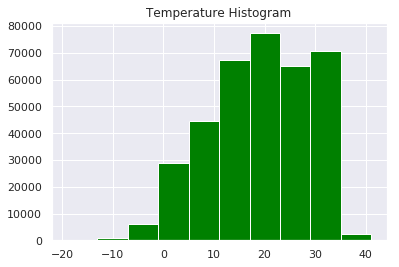

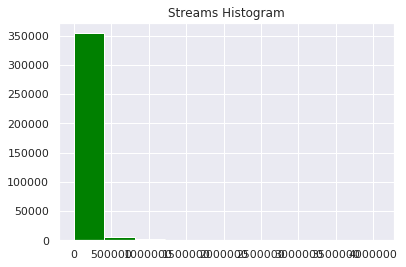

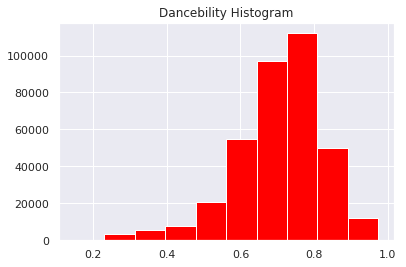

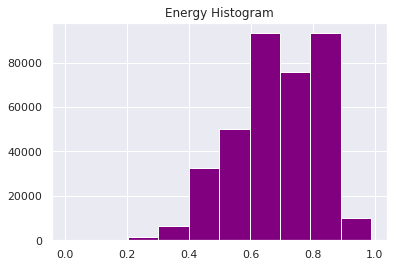

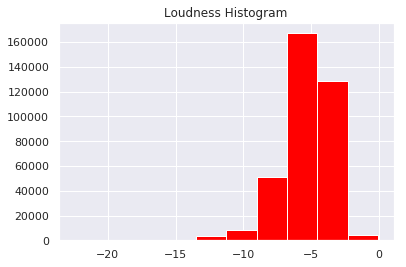

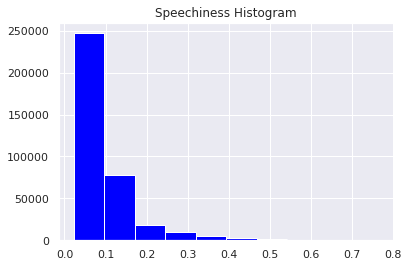

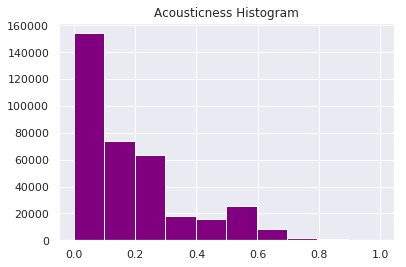

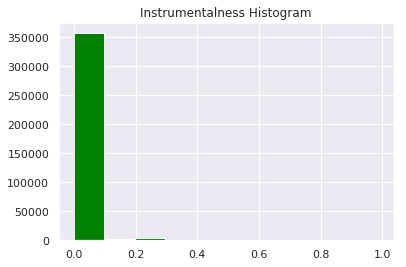

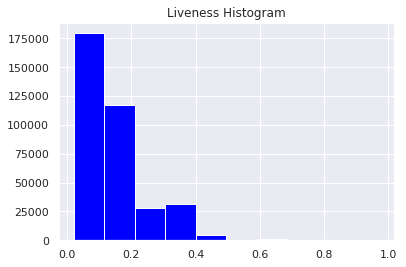

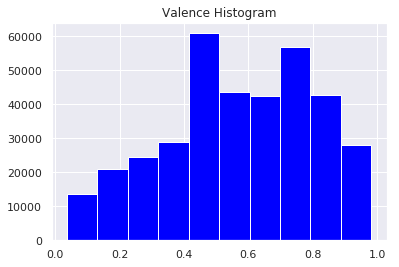

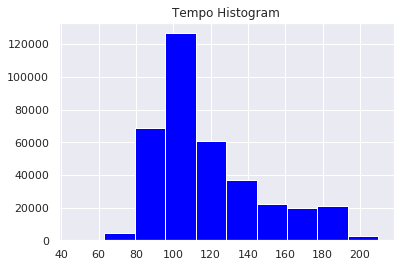

In [0]:
import random as rdn
cols = df.columns.tolist()
print(cols)
removal= ['Date', 'Country_Name', 'Position', 'Track Name', 'Artist']
for i in removal:
  cols.remove(i)
  
colors = ["red", "blue","green", "purple"]
for column in cols:
  plot = df[column].hist(color = colors[rdn.randint(0,len(colors)-1)])
  plt.title(column+ " Histogram")
  fig = plot.get_figure() 
  plt.show()
  fig.savefig("/content/drive/My Drive/project_210/Histograms/" + column + ".png" )


#df.hist(figsize = (20,20))
#plt.show()


## Correlation Matrix

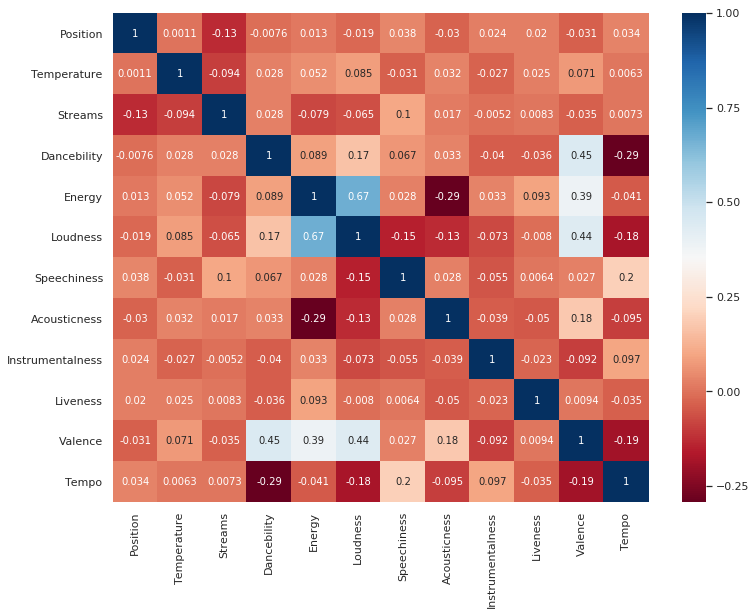

In [0]:
from matplotlib import cm 
plt.figure(figsize=(12, 9))
corr = df.corr()
heat=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap=cm.RdBu,annot=True)


heat.get_figure().savefig("/content/drive/My Drive/project_210/Correlation Matrix/" + "Correlation Matrix" + ".png" )

In [0]:
#pd.plotting.scatter_matrix(df)

## Pairwise Plot

[]

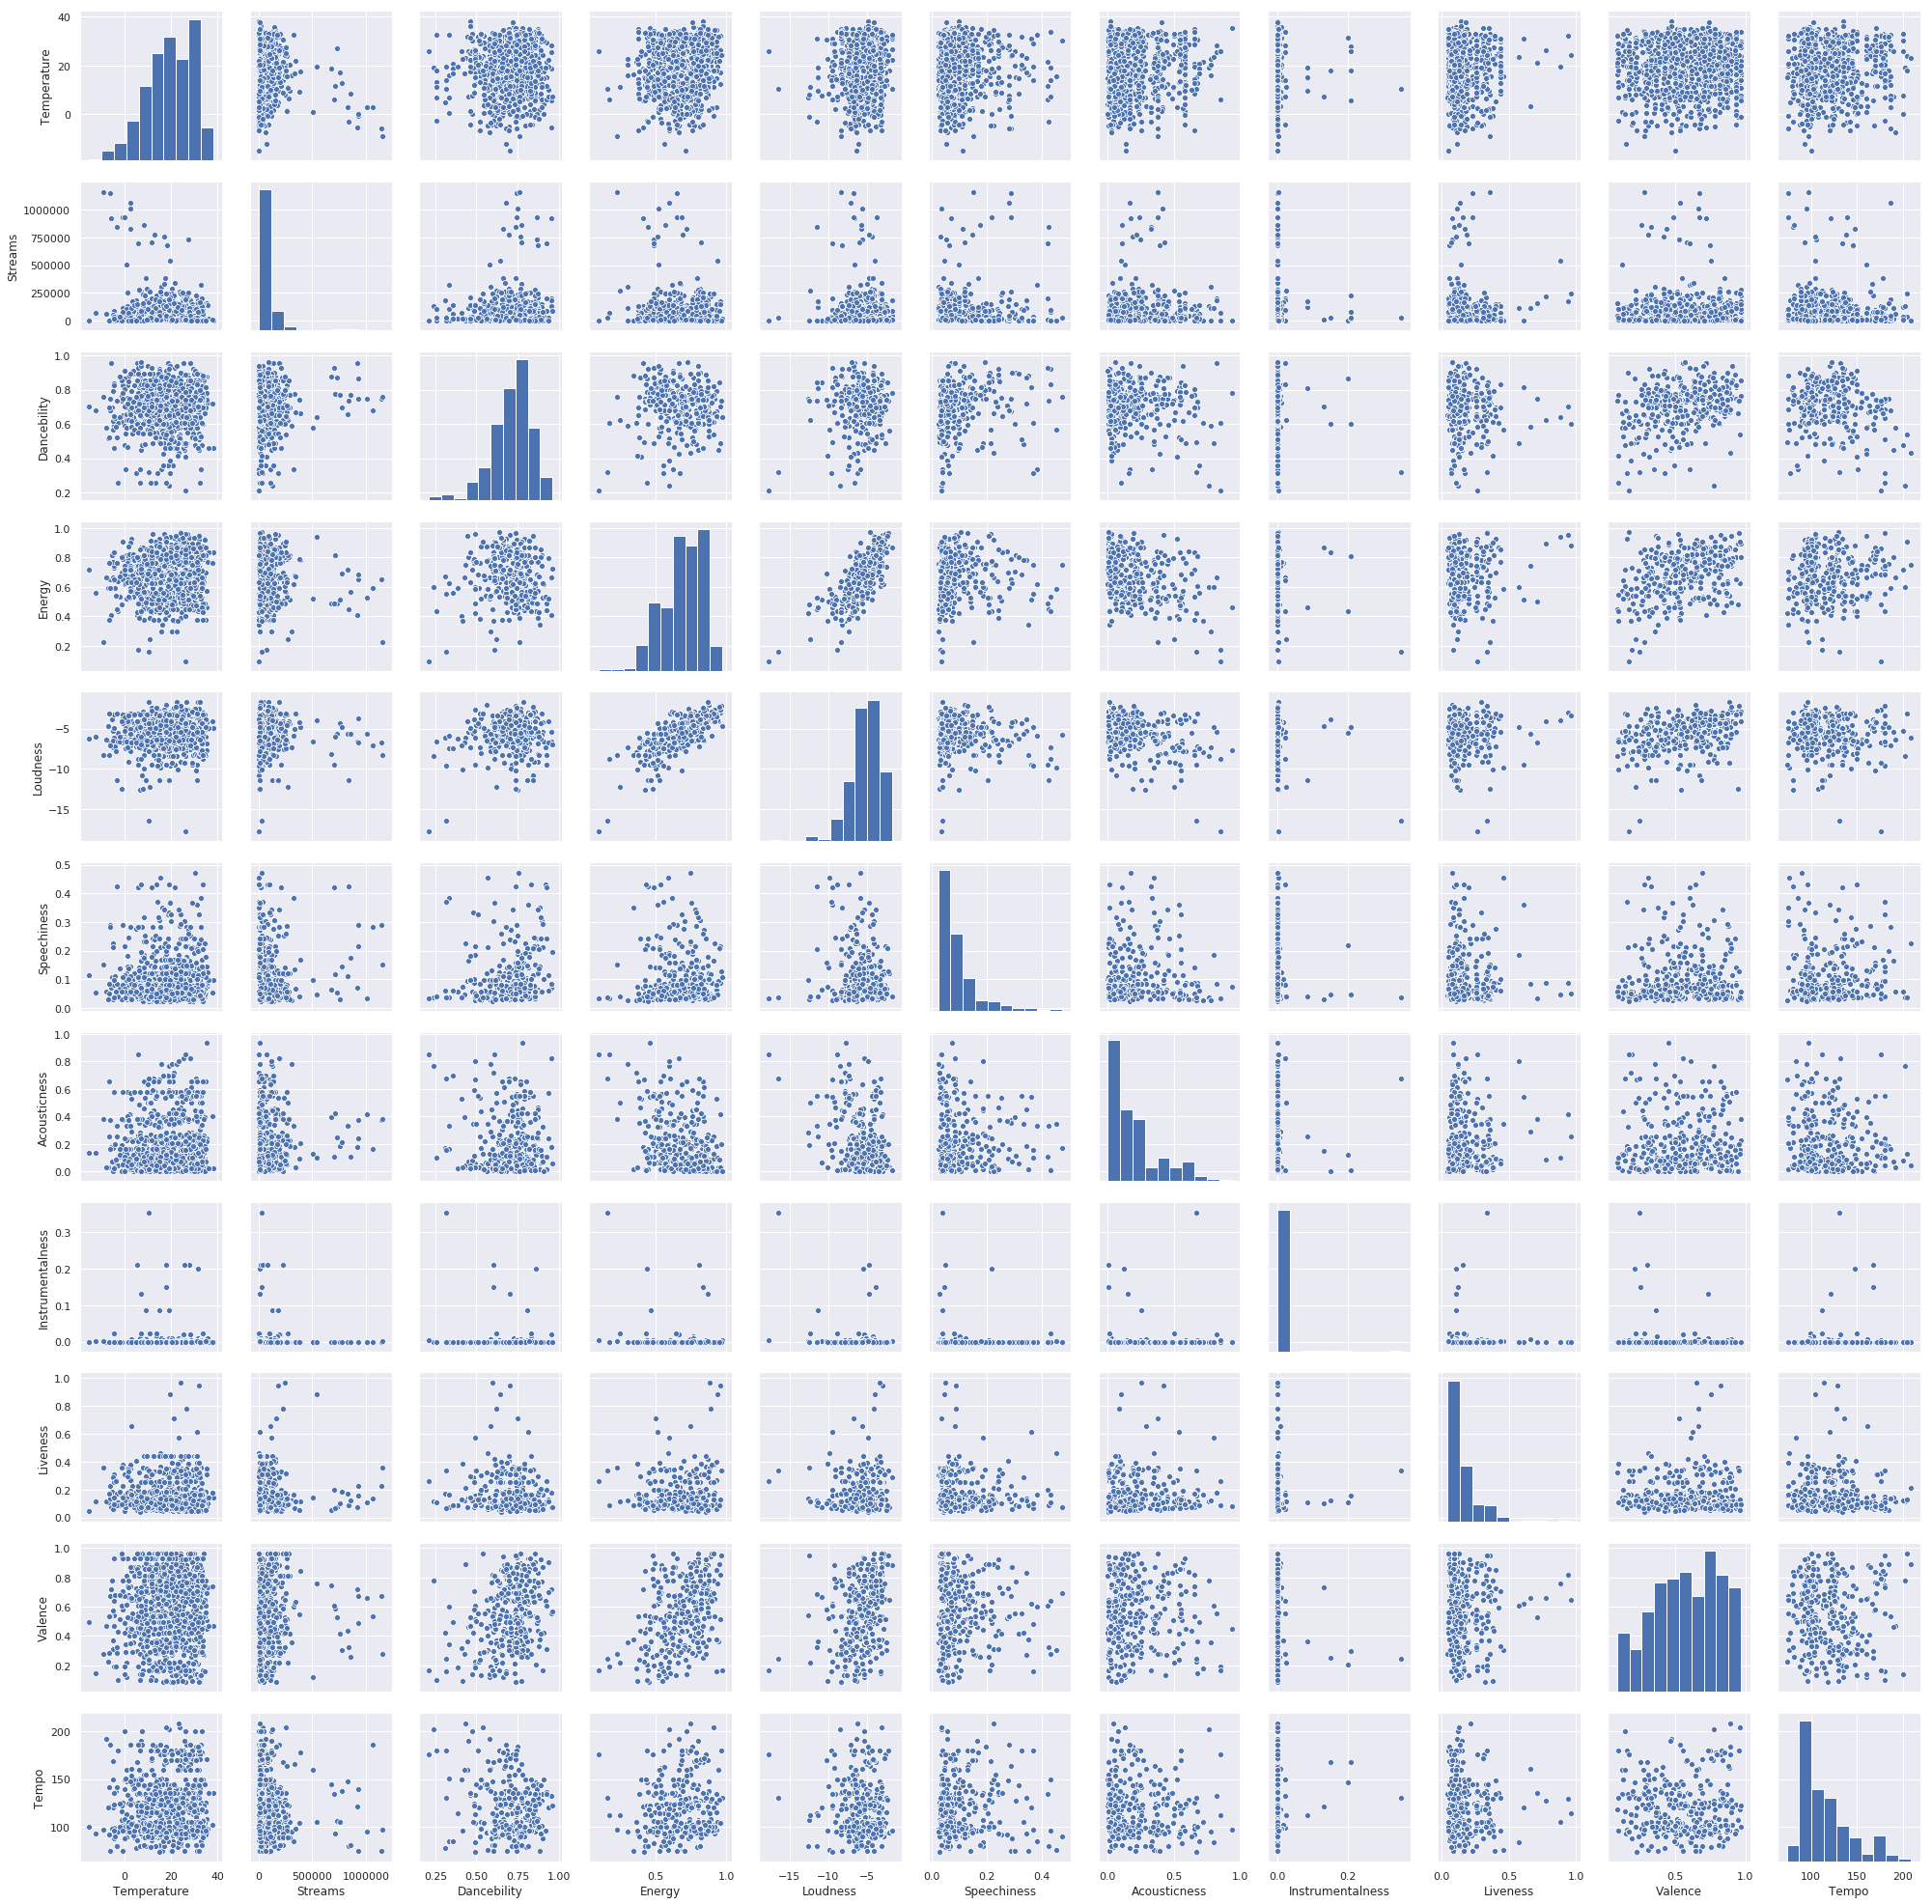

In [0]:

sns.pairplot(data=df.sample(1000), vars=cols)
plt.savefig("/content/drive/My Drive/project_210/Pairplot/" + "Pairplot" + ".png" )
plt.plot()


# Hypothesis Testing

---



## Hypothesis 1: 

---



**Null Hypothesis: **

Temperature has no effect on dancebility of the song.

**Testing Prosedure**:

Our data consist of a time series of each day of one year period and for each day there is 52 different countries. For each day, country tuple there exist a unique temperature value. Also for each day and country , there is 20 different song listed in their rankings .For testing average of the 20 songs danceability value (since they all share same temperature value) and corresponding temperatures will be examined. We will divide temperature group as above average and below median temperature value in order to get equal size groups.

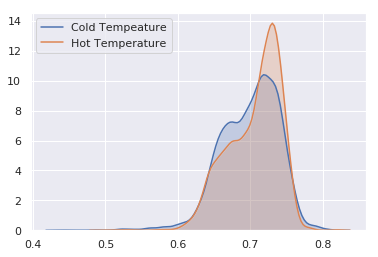

In [0]:
testdf=df[["Date","Country_Name","Temperature","Dancebility"]].groupby(["Date",	"Country_Name"]).mean()
# since Temperature are equal for songs mean has no affect on Temperature
median_value = testdf["Temperature"].median()

test_group_df = testdf[testdf["Temperature"] <= median_value]
rest_group_df = testdf[testdf["Temperature"] >  median_value]

ax = sns.kdeplot(test_group_df["Dancebility"].rename("Cold Tempeature"), shade=True)
sns.kdeplot(rest_group_df["Dancebility"].rename("Hot Temperature"),  ax=ax, shade=True)
plt.savefig("/content/drive/My Drive/project_210/Hypothesis/" + "Hypothesis1" + ".png" )
plt.show()


In [0]:
signifance=0.05
test_group_values = test_group_df["Dancebility"]
rest_group_values = rest_group_df["Dancebility"]

_, p_value = stats.ttest_ind(a=test_group_values, b=rest_group_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)
if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, temperature affects dancebility.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, temperature does not affect dancebility.")

P value:  3.59E-25
Signifance Level: 0.05
Based on current value of p value we reject null hypothesis, temperature affects dancebility.


## Hypothesis 2:

---



**Null Hypothesis: **

Danceability has no effect on popularity of the song. 

**Testing Prosedure**:

Popularity means ranking , we will analyze hypothesis as dividing the group into 2 subgroups. Ranking  1-10 and other group Ranking 10-20.  (1-5, 15-20 could be another choice but since populariy generally indicates the very top instances. But this will result a inconsistincy in the group size. (1-10 and 10-20 have equal legths, more consistent)

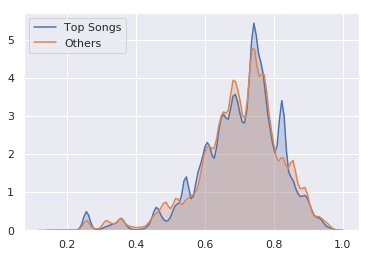

In [0]:
test_group_df = df[df["Position"] <= 10]
rest_group_df = df[df["Position"] >  10]

ax = sns.kdeplot(test_group_df["Dancebility"].rename("Top Songs"), shade=True)
sns.kdeplot(rest_group_df["Dancebility"].rename("Others"),  ax=ax, shade=True)
plt.savefig("/content/drive/My Drive/project_210/Hypothesis/" + "Hypothesis2" + ".png" )

plt.show()

In [0]:
signifance=0.05
test_group_values = test_group_df["Dancebility"]
rest_group_values = rest_group_df["Dancebility"]

_, p_value = stats.ttest_ind(a=test_group_values, b=rest_group_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)
if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, dancebility affects popularity.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, dancebility does not affect popularity.")

P value:  9.07E-05
Signifance Level: 0.05
Based on current value of p value we reject null hypothesis, dancebility affects popularity.


#Linear Regression

---


##Dancebility vs Streams

L score is  8.66E-04
Mean Square Error is  2.40E+10


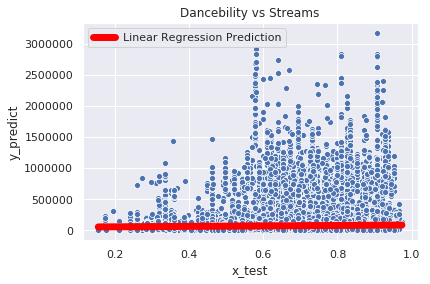

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#print(df.head())
lr = linear_model.LinearRegression()

X = df.iloc[:,7].values
y = df.iloc[:,6].values

X=X.reshape(-1, 1) 
y=y.reshape(-1, 1)


# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

lr.fit(X_train, y_train)
print("L score is " ,format(lr.score(X_test, y_test),".2E"))
y_predict = lr.predict(X_test)


lr_mse = mean_squared_error(y_predict, y_test)
print("Mean Square Error is " ,format(lr_mse,".2E"))

df_result= pd.DataFrame(data={ 'x_test': X_test.flatten(),'y_actual': y_test.flatten(),'y_predict': y_predict.flatten() })
sns.scatterplot(x="x_test", y="y_actual", data=df_result)
sns.lineplot(x="x_test", y="y_predict", data=df_result,color ="red", label = "Linear Regression Prediction",linewidth=7)

plt.title("Dancebility vs Streams")

plt.savefig("/content/drive/My Drive/project_210/Linear Regression/" + "Linear Regression_Dancebility_Streams" + ".png" )

plt.show()

L score is too small and as expected MSE is huge. Also graph suggests no linear relation between dancebility and stream count. As a result linear
models are not enough to understand streams and dancebility.


##Energy vs Loudness


L score is  4.50E-01
Mean Square Error is  1.77E+00


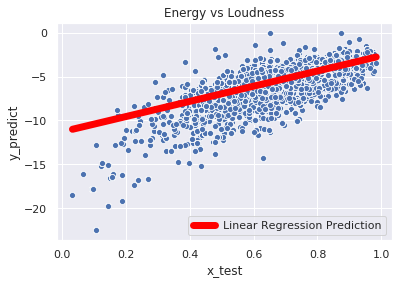

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#print(df.head())
lr = linear_model.LinearRegression()

X = df.iloc[:,8].values
y = df.iloc[:,9].values

X=X.reshape(-1, 1) 
y=y.reshape(-1, 1)


# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

lr.fit(X_train, y_train)
print("L score is " ,format(lr.score(X_test, y_test),".2E"))
y_predict = lr.predict(X_test)


lr_mse = mean_squared_error(y_predict, y_test)
print("Mean Square Error is " ,format(lr_mse,".2E"))

df_result= pd.DataFrame(data={ 'x_test': X_test.flatten(),'y_actual': y_test.flatten(),'y_predict': y_predict.flatten() })
sns.scatterplot(x="x_test", y="y_actual", data=df_result)
sns.lineplot(x="x_test", y="y_predict", data=df_result,color ="red", label = "Linear Regression Prediction",linewidth=7)

plt.title("Energy vs Loudness")

plt.savefig("/content/drive/My Drive/project_210/Linear Regression/" + "Linear Regression_Energy_Loudness" + ".png" )

plt.show()

Energy and Loudness 's pairwise relation hard to relate temperature's effect on stream count as as theme off project but they have a good correlation and we want to show how linear regression could be useful by example. Also big L score and low mean squared error confirms the graph.

## Extra Pairwise Regression

---



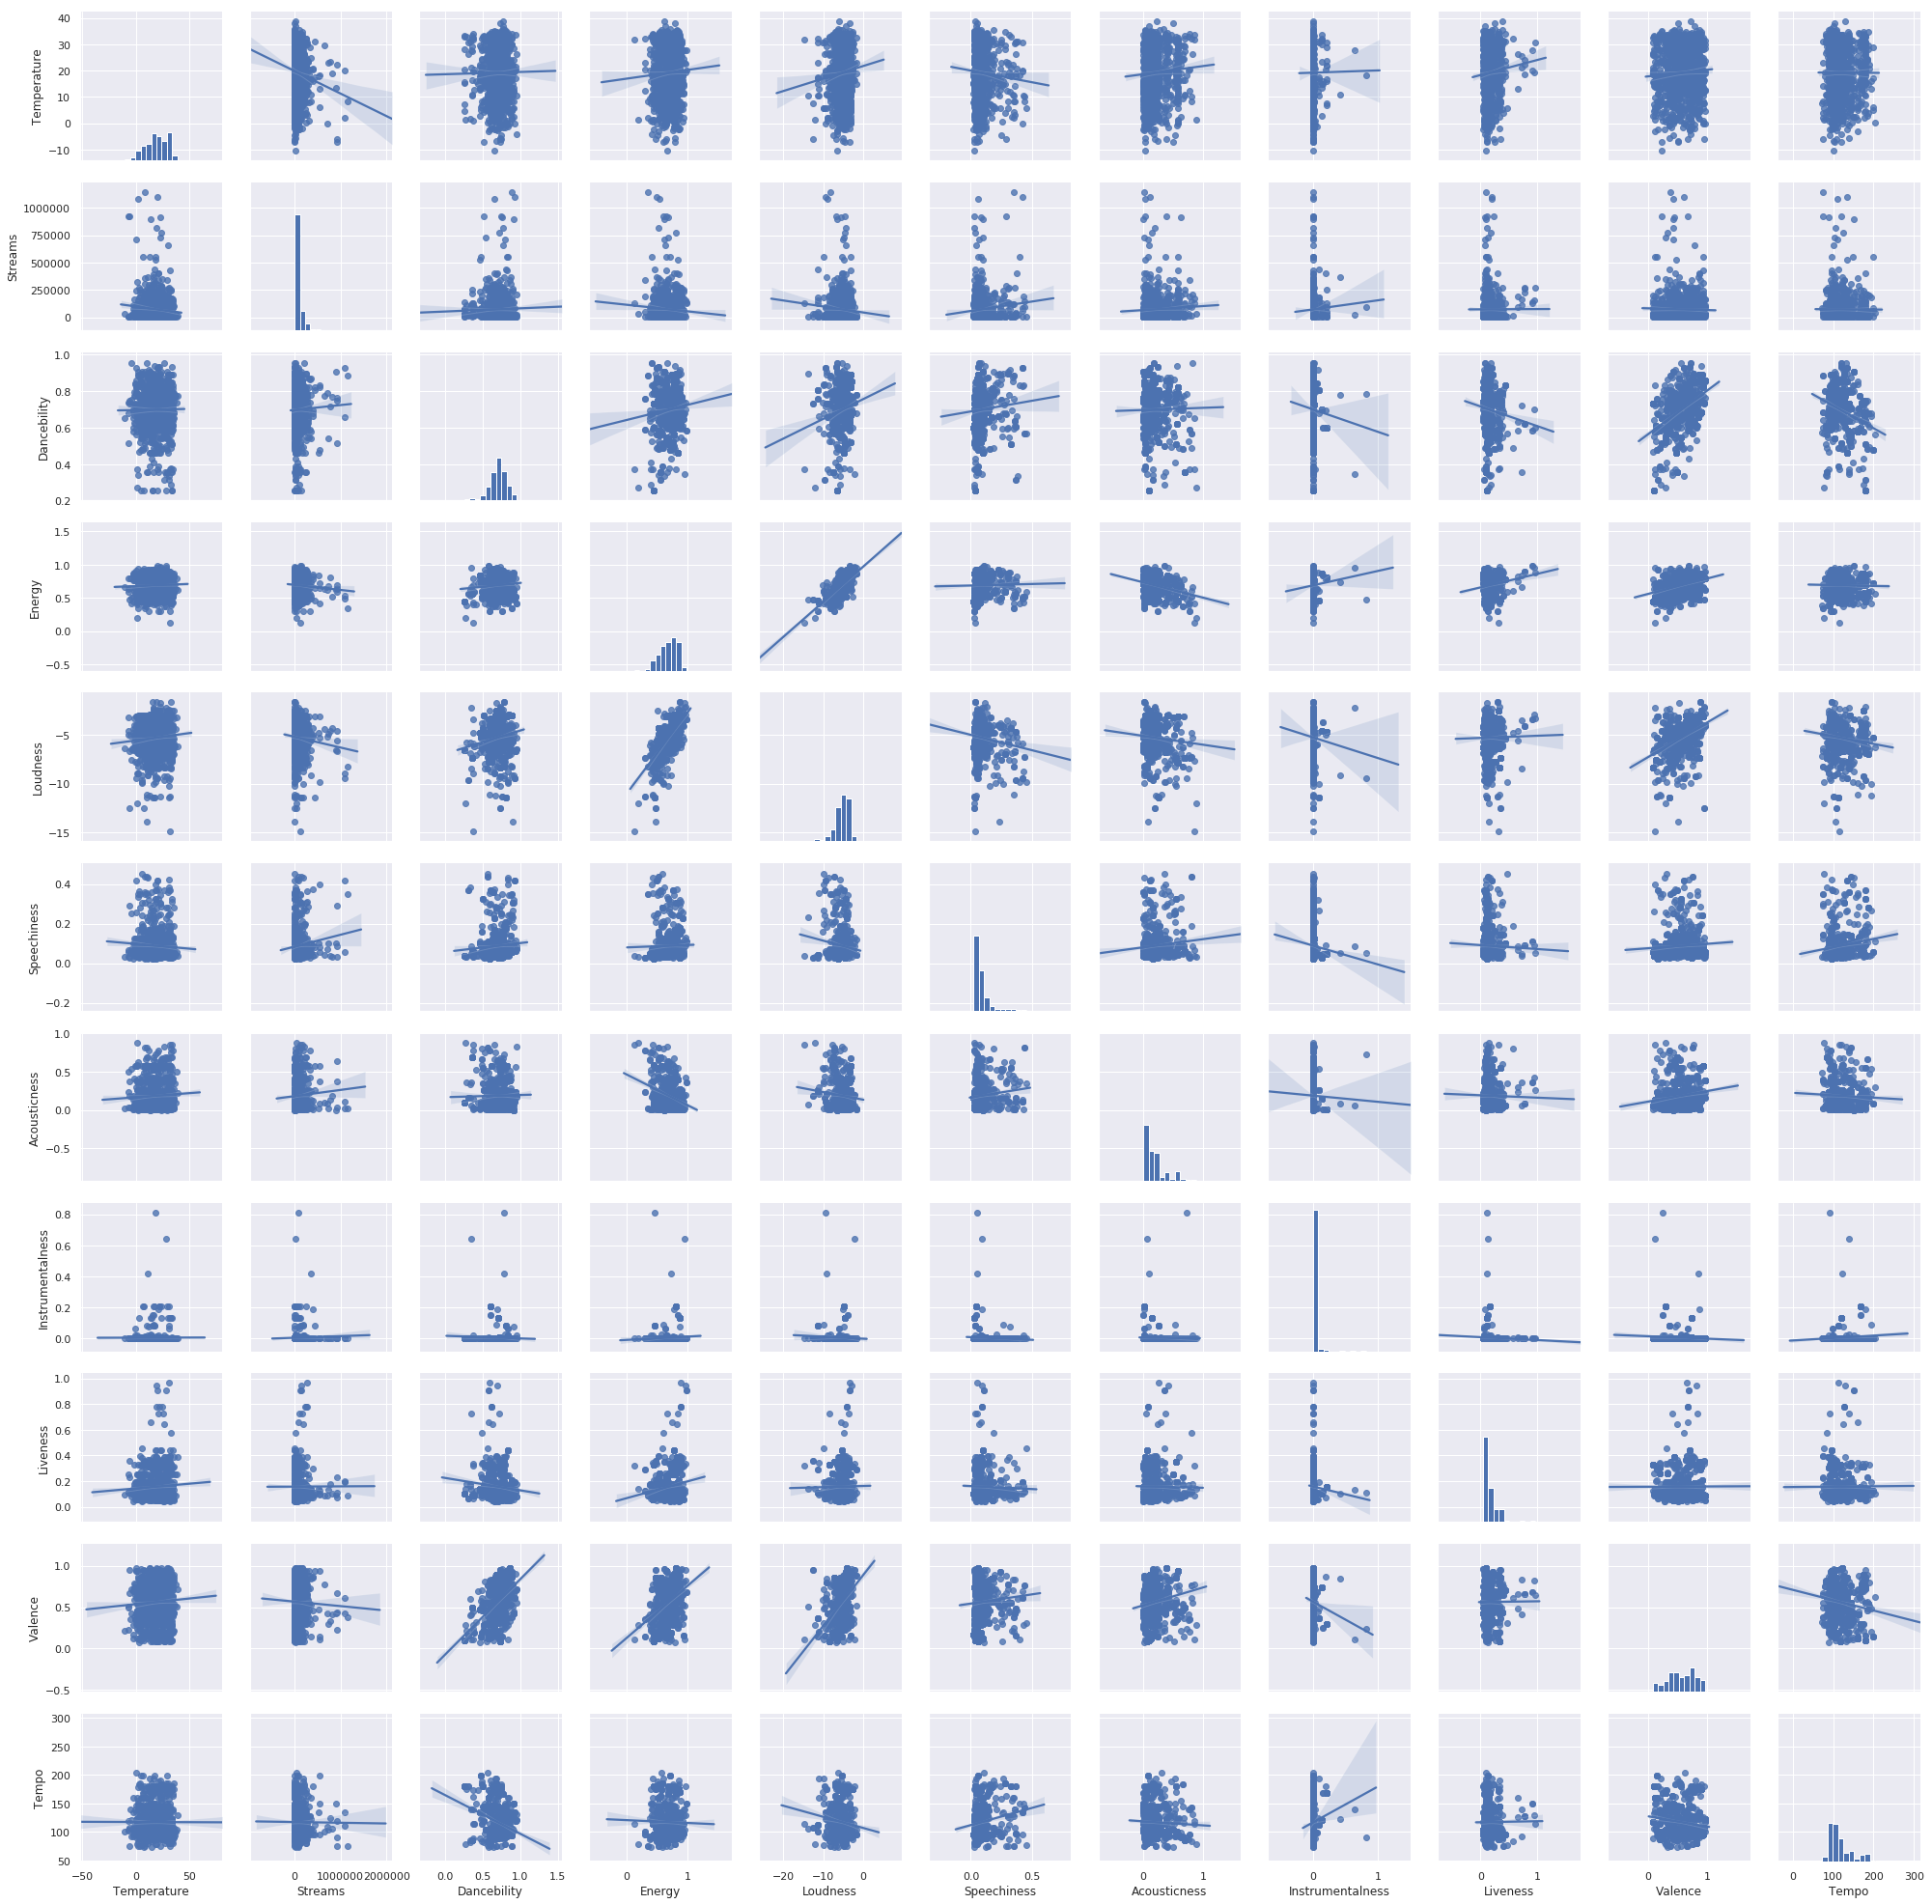

In [0]:
g = sns.PairGrid(df[cols].sample(1000))
g =  g.map_diag(plt.hist)
g =  g.map_offdiag(sns.regplot)
g.savefig("/content/drive/My Drive/project_210/Pairplot/" + "Pairwise Regression Sample Size =1000" + ".png" )




#ML

##Preprocess


In [3]:
df.head()


,Date,Country_Name,Position,Temperature,Track Name,Artist,Streams,Dancebility,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,2017-01-01,Ecuador,1,22.2,Reggaetón Lento (Bailemos),CNCO,19272,0.761,0.838,-3.073,0.0502,0.40000,0.000000,0.176,0.710,93.974
1,2017-01-01,Ecuador,2,22.2,Chantaje,Shakira,19270,0.852,0.773,-2.921,0.0776,0.18700,0.000030,0.159,0.907,102.034
2,2017-01-01,Ecuador,3,22.2,Otra Vez (feat. J Balvin),Zion & Lennox,15761,0.832,0.772,-5.429,0.1000,0.05590,0.000486,0.440,0.704,96.016
3,2017-01-01,Ecuador,4,22.2,Vente Pa' Ca,Ricky Martin,14954,0.663,0.920,-4.070,0.2260,0.00431,0.000017,0.101,0.533,99.935
4,2017-01-01,Ecuador,5,22.2,Safari,J Balvin,14269,0.508,0.687,-4.361,0.3260,0.55100,0.000003,0.126,0.555,180.044


In [4]:
df.dtypes

Date                 object
Country_Name         object
Position              int64
Temperature         float64
Track Name           object
Artist               object
Streams               int64
Dancebility         float64
Energy              float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
dtype: object

In [5]:
df_std = df.copy()
df_std.head()

,Date,Country_Name,Position,Temperature,Track Name,Artist,Streams,Dancebility,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,2017-01-01,Ecuador,1,22.2,Reggaetón Lento (Bailemos),CNCO,19272,0.761,0.838,-3.073,0.0502,0.40000,0.000000,0.176,0.710,93.974
1,2017-01-01,Ecuador,2,22.2,Chantaje,Shakira,19270,0.852,0.773,-2.921,0.0776,0.18700,0.000030,0.159,0.907,102.034
2,2017-01-01,Ecuador,3,22.2,Otra Vez (feat. J Balvin),Zion & Lennox,15761,0.832,0.772,-5.429,0.1000,0.05590,0.000486,0.440,0.704,96.016
3,2017-01-01,Ecuador,4,22.2,Vente Pa' Ca,Ricky Martin,14954,0.663,0.920,-4.070,0.2260,0.00431,0.000017,0.101,0.533,99.935
4,2017-01-01,Ecuador,5,22.2,Safari,J Balvin,14269,0.508,0.687,-4.361,0.3260,0.55100,0.000003,0.126,0.555,180.044


In [6]:
from sklearn.preprocessing import OrdinalEncoder
cat_df=df_std.loc[:,["Country_Name"]]
col_names = cat_df.columns.values
cat_df

,Country_Name
0,Ecuador
1,Ecuador
2,Ecuador
3,Ecuador
4,Ecuador
5,Ecuador
6,Ecuador
7,Ecuador
8,Ecuador
9,Ecuador


In [7]:
pandas_onehot_df = pd.get_dummies(cat_df)
pandas_onehot_df.head()


,Country_Name_Argentina,Country_Name_Australia,Country_Name_Austria,Country_Name_Belgium,Country_Name_Bolivia,Country_Name_Brazil,Country_Name_Canada,Country_Name_Chile,Country_Name_Colombia,Country_Name_Costa Rica,Country_Name_Czech Republic,Country_Name_Denmark,Country_Name_Dominican Republic,Country_Name_Ecuador,Country_Name_El Salvador,Country_Name_Estonia,Country_Name_Finland,Country_Name_France,Country_Name_Germany,Country_Name_Greece,Country_Name_Honduras,Country_Name_Hong Kong,Country_Name_Hungary,Country_Name_Iceland,Country_Name_Indonesia,Country_Name_Ireland,Country_Name_Italy,Country_Name_Japan,Country_Name_Latvia,Country_Name_Lithuania,Country_Name_Luxembourg,Country_Name_Malaysia,Country_Name_Netherlands,Country_Name_New Zealand,Country_Name_Norway,Country_Name_Panama,Country_Name_Paraguay,Country_Name_Peru,Country_Name_Philippines,Country_Name_Poland,Country_Name_Portugal,Country_Name_Singapore,Country_Name_Slovakia,Country_Name_Spain,Country_Name_Sweden,Country_Name_Switzerland,Country_Name_Turkey,Country_Name_UK,Country_Name_USA,Country_Name_Uruguay
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:

for i in pandas_onehot_df.columns.values:
  df_std[i]= pandas_onehot_df[i]
df_std.head()
  
 

,Date,Country_Name,Position,Temperature,Track Name,Artist,Streams,Dancebility,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Country_Name_Argentina,Country_Name_Australia,Country_Name_Austria,Country_Name_Belgium,Country_Name_Bolivia,Country_Name_Brazil,Country_Name_Canada,Country_Name_Chile,Country_Name_Colombia,Country_Name_Costa Rica,Country_Name_Czech Republic,Country_Name_Denmark,Country_Name_Dominican Republic,Country_Name_Ecuador,Country_Name_El Salvador,Country_Name_Estonia,Country_Name_Finland,Country_Name_France,Country_Name_Germany,Country_Name_Greece,Country_Name_Honduras,Country_Name_Hong Kong,Country_Name_Hungary,Country_Name_Iceland,Country_Name_Indonesia,Country_Name_Ireland,Country_Name_Italy,Country_Name_Japan,Country_Name_Latvia,Country_Name_Lithuania,Country_Name_Luxembourg,Country_Name_Malaysia,Country_Name_Netherlands,Country_Name_New Zealand,Country_Name_Norway,Country_Name_Panama,Country_Name_Paraguay,Country_Name_Peru,Country_Name_Philippines,Country_Name_Poland,Country_Name_Portugal,Country_Name_Singapore,Country_Name_Slovakia,Country_Name_Spain,Country_Name_Sweden,Country_Name_Switzerland,Country_Name_Turkey,Country_Name_UK,Country_Name_USA,Country_Name_Uruguay
0,2017-01-01,Ecuador,1,22.2,Reggaetón Lento (Bailemos),CNCO,19272,0.761,0.838,-3.073,0.0502,0.40000,0.000000,0.176,0.710,93.974,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-01-01,Ecuador,2,22.2,Chantaje,Shakira,19270,0.852,0.773,-2.921,0.0776,0.18700,0.000030,0.159,0.907,102.034,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017-01-01,Ecuador,3,22.2,Otra Vez (feat. J Balvin),Zion & Lennox,15761,0.832,0.772,-5.429,0.1000,0.05590,0.000486,0.440,0.704,96.016,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017-01-01,Ecuador,4,22.2,Vente Pa' Ca,Ricky Martin,14954,0.663,0.920,-4.070,0.2260,0.00431,0.000017,0.101,0.533,99.935,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2017-01-01,Ecuador,5,22.2,Safari,J Balvin,14269,0.508,0.687,-4.361,0.3260,0.55100,0.000003,0.126,0.555,180.044,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df_std["Artist"].value_counts()

Ed Sheeran             22719
Luis Fonsi             11560
The Chainsmokers       11451
J Balvin               10610
ZAYN                    6943
Clean Bandit            6805
Kygo                    6500
DJ Khaled               6369
Ozuna                   6219
Imagine Dragons         6107
Maroon 5                5637
Post Malone             5530
Martin Garrix           5270
Dua Lipa                5240
Danny Ocean             4897
Camila Cabello          4888
Charlie Puth            4833
Wisin                   4630
Calvin Harris           4591
The Weeknd              4151
CNCO                    4104
Maluma                  3790
French Montana          3587
Jonas Blue              3563
Bruno Mars              3464
Shawn Mendes            3439
Shakira                 3395
Daddy Yankee            3344
Kendrick Lamar          3324
Drake                   3266
                       ...  
Jaz                        1
Nils Bech                  1
Arop                       1
Destiny's Chil

In [0]:
num=50
label=["group"+str(i) for i in range(num)]
x=pd.cut(df_std["Artist"].value_counts() ,num,labels=label)
artist=dict(x)



In [11]:
b=df_std["Artist"].tolist()
a=[]
for i in b:
  try:
    a.append(artist[i])
  except:
    a.append("group-1")
newOne=pd.DataFrame(a)
newOne[newOne[0]=="group-1"]
newOne=newOne.rename(index=str, columns={0: "Group"})
artistGroups= pd.get_dummies(newOne)
artistGroups

,Group_group-1,Group_group0,Group_group1,Group_group10,Group_group11,Group_group12,Group_group13,Group_group14,Group_group15,Group_group2,Group_group23,Group_group25,Group_group3,Group_group4,Group_group49,Group_group5,Group_group6,Group_group7,Group_group8,Group_group9
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
for i in artistGroups.columns.values:
  df_std[i]=artistGroups[i].tolist()


In [13]:
df_std.head()

,Date,Country_Name,Position,Temperature,Track Name,Artist,Streams,Dancebility,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Country_Name_Argentina,Country_Name_Australia,Country_Name_Austria,Country_Name_Belgium,Country_Name_Bolivia,Country_Name_Brazil,Country_Name_Canada,Country_Name_Chile,Country_Name_Colombia,Country_Name_Costa Rica,Country_Name_Czech Republic,Country_Name_Denmark,Country_Name_Dominican Republic,Country_Name_Ecuador,Country_Name_El Salvador,Country_Name_Estonia,Country_Name_Finland,Country_Name_France,Country_Name_Germany,Country_Name_Greece,Country_Name_Honduras,Country_Name_Hong Kong,Country_Name_Hungary,Country_Name_Iceland,...,Country_Name_Luxembourg,Country_Name_Malaysia,Country_Name_Netherlands,Country_Name_New Zealand,Country_Name_Norway,Country_Name_Panama,Country_Name_Paraguay,Country_Name_Peru,Country_Name_Philippines,Country_Name_Poland,Country_Name_Portugal,Country_Name_Singapore,Country_Name_Slovakia,Country_Name_Spain,Country_Name_Sweden,Country_Name_Switzerland,Country_Name_Turkey,Country_Name_UK,Country_Name_USA,Country_Name_Uruguay,Group_group-1,Group_group0,Group_group1,Group_group10,Group_group11,Group_group12,Group_group13,Group_group14,Group_group15,Group_group2,Group_group23,Group_group25,Group_group3,Group_group4,Group_group49,Group_group5,Group_group6,Group_group7,Group_group8,Group_group9
0,2017-01-01,Ecuador,1,22.2,Reggaetón Lento (Bailemos),CNCO,19272,0.761,0.838,-3.073,0.0502,0.40000,0.000000,0.176,0.710,93.974,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2017-01-01,Ecuador,2,22.2,Chantaje,Shakira,19270,0.852,0.773,-2.921,0.0776,0.18700,0.000030,0.159,0.907,102.034,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2017-01-01,Ecuador,3,22.2,Otra Vez (feat. J Balvin),Zion & Lennox,15761,0.832,0.772,-5.429,0.1000,0.05590,0.000486,0.440,0.704,96.016,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2017-01-01,Ecuador,4,22.2,Vente Pa' Ca,Ricky Martin,14954,0.663,0.920,-4.070,0.2260,0.00431,0.000017,0.101,0.533,99.935,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2017-01-01,Ecuador,5,22.2,Safari,J Balvin,14269,0.508,0.687,-4.361,0.3260,0.55100,0.000003,0.126,0.555,180.044,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Normalizing Tempo since it is quantitively too large than others.


In [14]:
df_std["Tempo"] = (df_std["Tempo"] - df_std["Tempo"].mean()) / df_std["Tempo"].std()
df_std["Temperature"] = (df_std["Temperature"] - df_std["Temperature"].mean()) / df_std["Temperature"].std()
#df_std["Country_Name"] = df_std["Country_Name"].astype('category')
df_std.head()

,Date,Country_Name,Position,Temperature,Track Name,Artist,Streams,Dancebility,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Country_Name_Argentina,Country_Name_Australia,Country_Name_Austria,Country_Name_Belgium,Country_Name_Bolivia,Country_Name_Brazil,Country_Name_Canada,Country_Name_Chile,Country_Name_Colombia,Country_Name_Costa Rica,Country_Name_Czech Republic,Country_Name_Denmark,Country_Name_Dominican Republic,Country_Name_Ecuador,Country_Name_El Salvador,Country_Name_Estonia,Country_Name_Finland,Country_Name_France,Country_Name_Germany,Country_Name_Greece,Country_Name_Honduras,Country_Name_Hong Kong,Country_Name_Hungary,Country_Name_Iceland,...,Country_Name_Luxembourg,Country_Name_Malaysia,Country_Name_Netherlands,Country_Name_New Zealand,Country_Name_Norway,Country_Name_Panama,Country_Name_Paraguay,Country_Name_Peru,Country_Name_Philippines,Country_Name_Poland,Country_Name_Portugal,Country_Name_Singapore,Country_Name_Slovakia,Country_Name_Spain,Country_Name_Sweden,Country_Name_Switzerland,Country_Name_Turkey,Country_Name_UK,Country_Name_USA,Country_Name_Uruguay,Group_group-1,Group_group0,Group_group1,Group_group10,Group_group11,Group_group12,Group_group13,Group_group14,Group_group15,Group_group2,Group_group23,Group_group25,Group_group3,Group_group4,Group_group49,Group_group5,Group_group6,Group_group7,Group_group8,Group_group9
0,2017-01-01,Ecuador,1,0.32667,Reggaetón Lento (Bailemos),CNCO,19272,0.761,0.838,-3.073,0.0502,0.40000,0.000000,0.176,0.710,-0.840374,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2017-01-01,Ecuador,2,0.32667,Chantaje,Shakira,19270,0.852,0.773,-2.921,0.0776,0.18700,0.000030,0.159,0.907,-0.557656,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2017-01-01,Ecuador,3,0.32667,Otra Vez (feat. J Balvin),Zion & Lennox,15761,0.832,0.772,-5.429,0.1000,0.05590,0.000486,0.440,0.704,-0.768748,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2017-01-01,Ecuador,4,0.32667,Vente Pa' Ca,Ricky Martin,14954,0.663,0.920,-4.070,0.2260,0.00431,0.000017,0.101,0.533,-0.631282,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2017-01-01,Ecuador,5,0.32667,Safari,J Balvin,14269,0.508,0.687,-4.361,0.3260,0.55100,0.000003,0.126,0.555,2.178676,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [15]:
df_std.dtypes

Date                                object
Country_Name                        object
Position                             int64
Temperature                        float64
Track Name                          object
Artist                              object
Streams                              int64
Dancebility                        float64
Energy                             float64
Loudness                           float64
Speechiness                        float64
Acousticness                       float64
Instrumentalness                   float64
Liveness                           float64
Valence                            float64
Tempo                              float64
Country_Name_Argentina               uint8
Country_Name_Australia               uint8
Country_Name_Austria                 uint8
Country_Name_Belgium                 uint8
Country_Name_Bolivia                 uint8
Country_Name_Brazil                  uint8
Country_Name_Canada                  uint8
Country_Nam

In [0]:
labels=["Top","Up_Mid","Below_Mid","Bottom"]
df_std["Category"] =  pd.cut(df_std.Position, range(0, 21, 5), right=True, labels=labels)

In [17]:
from sklearn.model_selection import train_test_split
feature_cols=["Temperature","Dancebility",	"Energy"	,"Loudness"	,"Speechiness",	"Acousticness",	"Instrumentalness"	,"Liveness",	"Valence"	,"Tempo"	] + pandas_onehot_df.columns.values.tolist()+artistGroups.columns.values.tolist()
print(feature_cols)
X =df_std.loc[:,feature_cols]
y =df_std.loc[:,["Category"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state = 42)




['Temperature', 'Dancebility', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Country_Name_Argentina', 'Country_Name_Australia', 'Country_Name_Austria', 'Country_Name_Belgium', 'Country_Name_Bolivia', 'Country_Name_Brazil', 'Country_Name_Canada', 'Country_Name_Chile', 'Country_Name_Colombia', 'Country_Name_Costa Rica', 'Country_Name_Czech Republic', 'Country_Name_Denmark', 'Country_Name_Dominican Republic', 'Country_Name_Ecuador', 'Country_Name_El Salvador', 'Country_Name_Estonia', 'Country_Name_Finland', 'Country_Name_France', 'Country_Name_Germany', 'Country_Name_Greece', 'Country_Name_Honduras', 'Country_Name_Hong Kong', 'Country_Name_Hungary', 'Country_Name_Iceland', 'Country_Name_Indonesia', 'Country_Name_Ireland', 'Country_Name_Italy', 'Country_Name_Japan', 'Country_Name_Latvia', 'Country_Name_Lithuania', 'Country_Name_Luxembourg', 'Country_Name_Malaysia', 'Country_Name_Netherlands', 'Country_Name_New Zealand', 'Country_N

##Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
max_acc=-1
index=-1
for i in range(1,40):
  rf  = RandomForestClassifier(max_depth=i)
  
  rf.fit(X_train, y_train)
  pred_rf = rf.predict(X_test)
  acc=metrics.accuracy_score(y_test, pred_rf)
  print("Accuracy of the random forest model: ",acc,"best at depth",i)
  if max_acc < acc:
    max_acc=acc
    index=i
  
print("Accuracy of the random forest model: ",max_acc,"best at depth",index)


Accuracy of the random forest model:  0.3115513550350031 best at depth 1
Accuracy of the random forest model:  0.32464394622538256 best at depth 2
Accuracy of the random forest model:  0.3400838421454778 best at depth 3
Accuracy of the random forest model:  0.3588209784337076 best at depth 4
Accuracy of the random forest model:  0.3815574814315117 best at depth 5
Accuracy of the random forest model:  0.3800017897338115 best at depth 6
Accuracy of the random forest model:  0.40551238013946156 best at depth 7
Accuracy of the random forest model:  0.4185292518224309 best at depth 8
Accuracy of the random forest model:  0.42985964356762785 best at depth 9
Accuracy of the random forest model:  0.43996475601109636 best at depth 10
Accuracy of the random forest model:  0.4480942776703173 best at depth 11
Accuracy of the random forest model:  0.45324320417420993 best at depth 12
Accuracy of the random forest model:  0.4694815967179035 best at depth 13
Accuracy of the random forest model:  0.47

Best Model is depth 24 and accuracy is 0.51 

In [19]:
rf=RandomForestClassifier(max_depth=index)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
rf.feature_importances_

array([4.00476454e-01, 3.57091409e-02, 3.93560987e-02, 3.46556599e-02,
       3.54334775e-02, 3.72195253e-02, 1.54706171e-02, 3.59536989e-02,
       3.72956451e-02, 3.93796874e-02, 5.12038805e-03, 4.30949144e-03,
       4.24696230e-03, 3.51717797e-03, 5.71583176e-03, 5.05911730e-03,
       3.80266579e-03, 4.74369275e-03, 7.25372092e-03, 6.05069430e-03,
       2.92926536e-03, 2.78694025e-03, 7.36093910e-03, 4.49037739e-03,
       6.09912266e-03, 2.86103811e-03, 3.56264030e-03, 4.00344556e-03,
       2.94360319e-03, 3.69091867e-03, 6.14092021e-03, 4.48776127e-03,
       3.83040162e-03, 3.81456241e-03, 4.89864696e-03, 5.05337675e-03,
       5.64451245e-03, 4.53160667e-03, 3.49556253e-03, 2.68900965e-03,
       1.46008857e-03, 5.33282396e-03, 4.29039881e-03, 4.84548220e-03,
       4.86084932e-03, 5.32691363e-03, 5.32081357e-03, 4.32897450e-03,
       7.44323025e-03, 3.41589346e-03, 4.93567602e-03, 3.94156566e-03,
       2.92226300e-03, 7.27424865e-03, 3.35448370e-03, 2.89972759e-03,
      

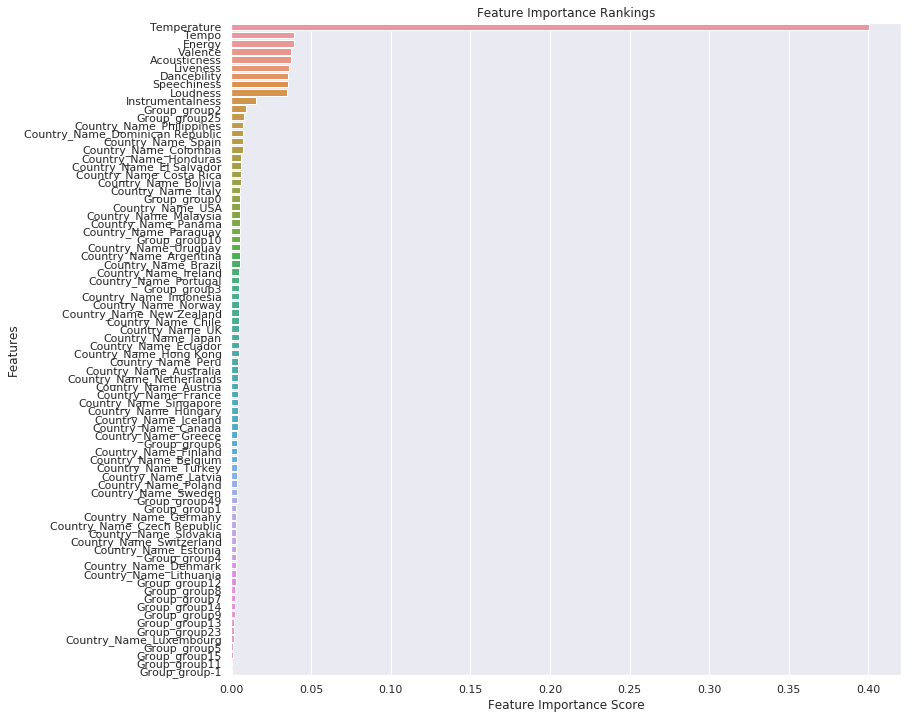

In [20]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importances, y=feature_importances.index)

# Add labels to our graph  
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings")
plt.show()

As expected temperature is the most important feature.

##Decision Tree


In [25]:
from sklearn.tree import DecisionTreeClassifier
max_acc=-1
index=-1
for i in range(1,30):
  dtree= DecisionTreeClassifier(criterion='entropy', max_depth=i)
  dtree.fit(X_train,y_train)
  pred_dtree= dtree.predict(X_test)
  acc= metrics.accuracy_score(y_test, pred_dtree)
  print("Accuracy of the decision tree model: ",acc, "at depth",i)
  if max_acc < acc:
    max_acc=acc
    index=i
print("Accuracy of decision tree model: ",max_acc, "best depth at",index)



Accuracy of the decision tree model:  0.2698780915930696 at depth 1
Accuracy of the decision tree model:  0.2790814535391986 at depth 2
Accuracy of the decision tree model:  0.29376415438519204 at depth 3
Accuracy of the decision tree model:  0.3041652612667185 at depth 4
Accuracy of the decision tree model:  0.3070701369146366 at depth 5
Accuracy of the decision tree model:  0.3246990149580445 at depth 6
Accuracy of the decision tree model:  0.34799308887405095 at depth 7
Accuracy of the decision tree model:  0.36195989619543895 at depth 8
Accuracy of the decision tree model:  0.37684910478891465 at depth 9
Accuracy of the decision tree model:  0.3944366812828261 at depth 10
Accuracy of the decision tree model:  0.40637971267888734 at depth 11
Accuracy of the decision tree model:  0.41941035154502215 at depth 12
Accuracy of the decision tree model:  0.4305411191343195 at depth 13
Accuracy of the decision tree model:  0.43881519621677806 at depth 14
Accuracy of the decision tree model:

Random forest slightly better than  decision tree but decision tree runs slightly faster so there is trade off between two.
Accuray of random forest is one 2 percent better than decision tree.

In [22]:
dtree.feature_importances_


array([4.26960564e-01, 1.83584864e-02, 3.20613111e-02, 3.38330442e-02,
       3.35504390e-02, 3.75014504e-02, 1.16567729e-02, 1.84936794e-02,
       4.07396821e-02, 2.95148025e-02, 4.79674921e-03, 5.99742272e-03,
       5.23115985e-03, 3.71290689e-03, 5.32469461e-03, 5.03126008e-03,
       4.01837768e-03, 4.70250348e-03, 7.63927308e-03, 6.52844225e-03,
       3.59099129e-03, 3.38717658e-03, 1.01325772e-02, 5.48379024e-03,
       6.30764802e-03, 2.57733168e-03, 3.13526593e-03, 4.57746686e-03,
       4.63247562e-03, 3.84222725e-03, 6.15915022e-03, 6.24132806e-03,
       4.03929317e-03, 2.88860086e-03, 5.52276979e-03, 6.16927508e-03,
       7.00264195e-03, 6.97026345e-03, 3.97916263e-03, 3.29487944e-03,
       1.71630379e-03, 5.42385913e-03, 6.07444283e-03, 6.40766643e-03,
       7.72107134e-03, 6.09300661e-03, 5.87038776e-03, 4.52153281e-03,
       7.39978301e-03, 3.99660198e-03, 5.80628876e-03, 4.33043735e-03,
       3.13105821e-03, 8.43341887e-03, 4.78446234e-03, 3.35473290e-03,
      

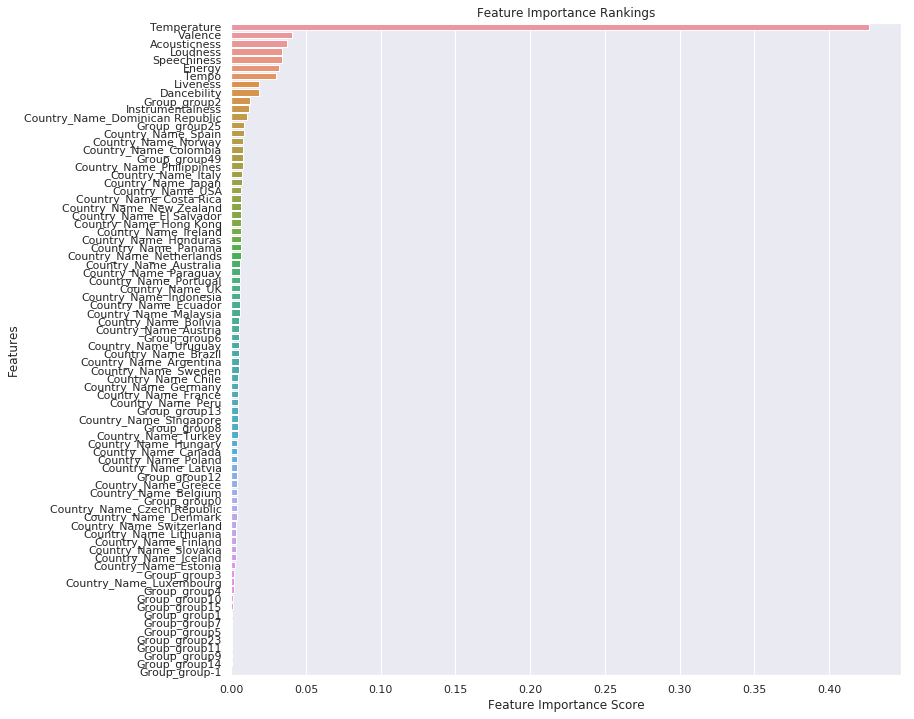

In [23]:
feature_importances = pd.Series(dtree.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importances, y=feature_importances.index)

# Add labels to our graph  
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance Rankings")
plt.show()

Again temperature is most important feature but other rankings changed look at tempo in the first one this one.

##KNN


This extra to check accuracy still results are very close.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for i in range(1,5,2):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  print("Accuracy of the model with k =  :",i,metrics.accuracy_score(y_test, y_pred))


Accuracy of the model with k =  : 1 0.4558107838345735
Accuracy of the model with k =  : 3 0.47476131146186834
